# Linear Regression with Penguins

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

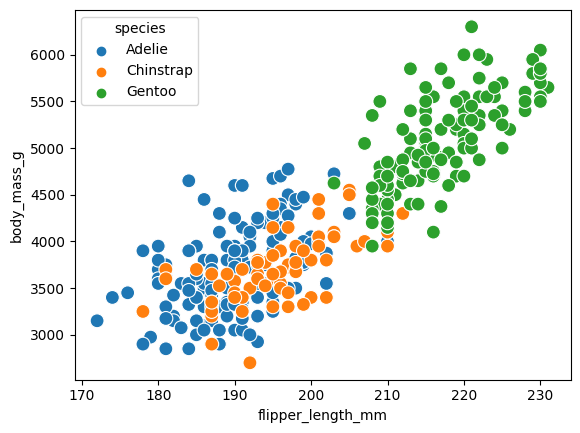

In [4]:
sns.scatterplot(data=df, 
                x="flipper_length_mm",
                y="body_mass_g",
                s=100,
                hue="species",
               )

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

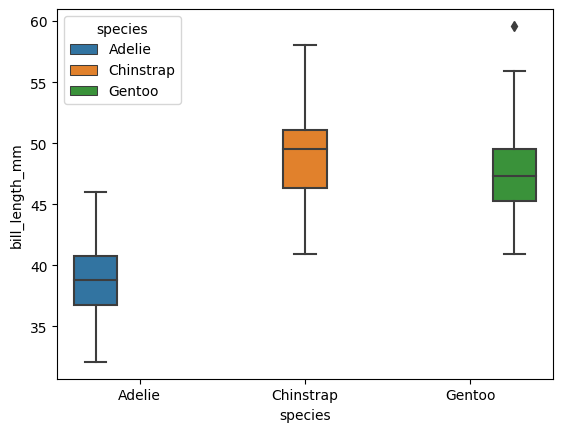

In [5]:
sns.boxplot(data=df, hue="species", x="species", y="bill_length_mm")

<Axes: xlabel='bill_length_mm', ylabel='Count'>

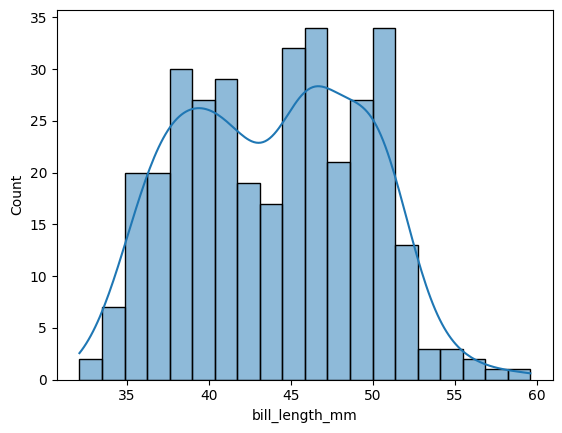

In [4]:
sns.histplot(data=df, x="bill_length_mm", bins=20, kde=True)

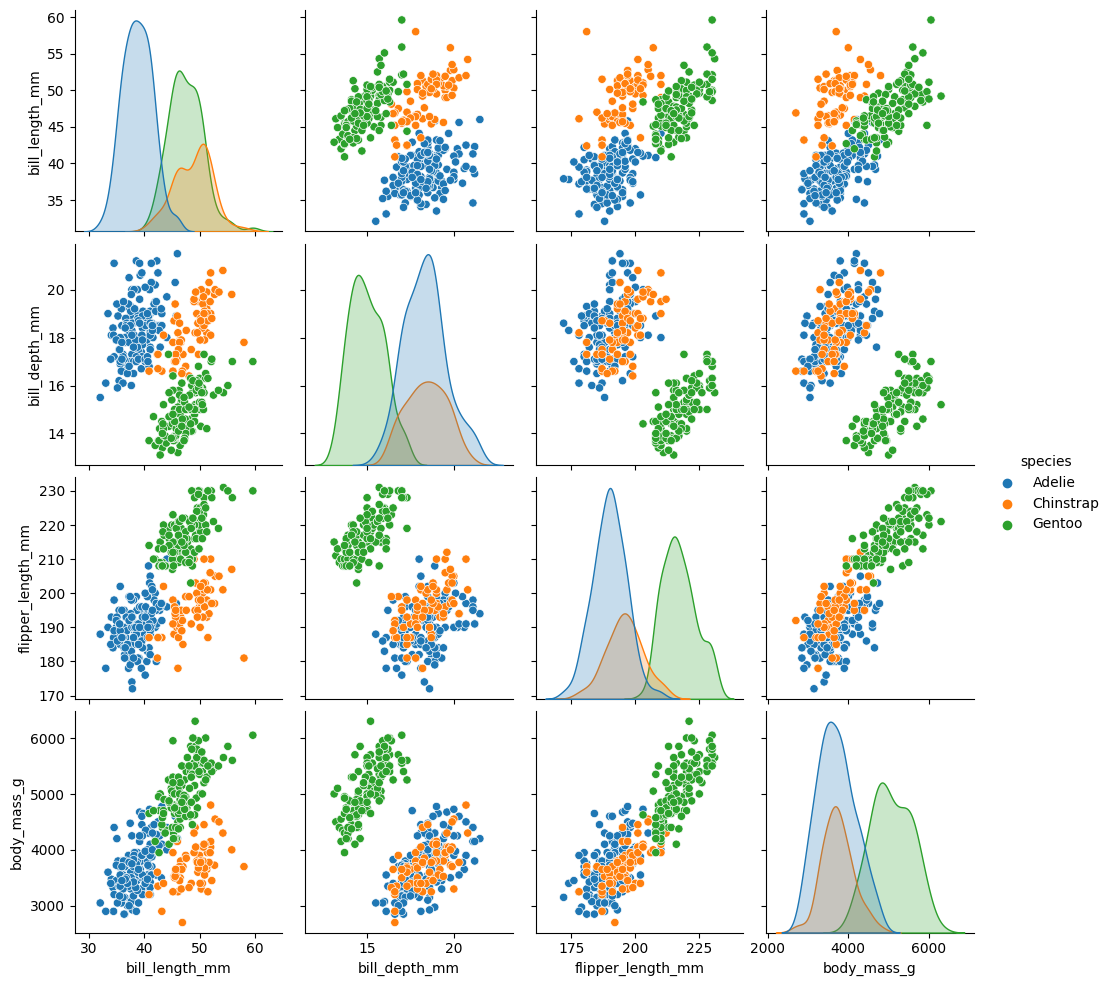

In [7]:
sns.pairplot(df, hue="species")

In [16]:
from statsmodels.regression.linear_model import OLS
from statsmodels import api as sm

In [22]:
df.dropna(inplace=True)       # remove all missing values
X = df["flipper_length_mm"]
X = sm.add_constant(X)        # needed for the intercept
y = df["body_mass_g"]

In [23]:
model = OLS(y, X).fit()       # Ordinary Least Squares
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          3.13e-105
Time:                        14:52:08   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Draw a line of best fit

In [28]:
xpred = [170, 230]               # 2 example flippers
xpred = sm.add_constant(xpred)
ypred = model.predict(xpred)
ypred

array([2653.96252734, 5663.15848387])

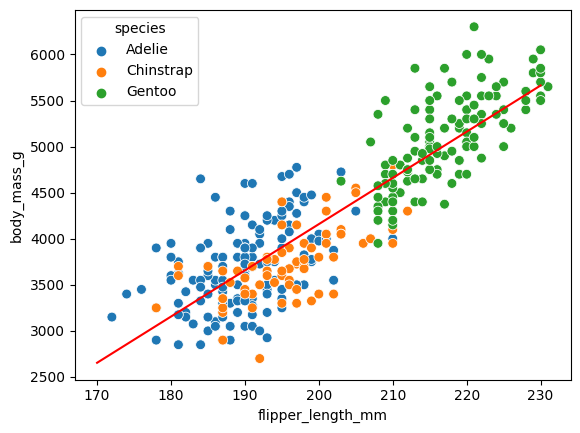

In [33]:
sns.scatterplot(data=df, 
                x="flipper_length_mm",
                y="body_mass_g",
                s=50,
                hue="species",
               )
plt.plot(xpred[:,1], ypred, color="red")

### Mean Squared Error

In [50]:
ypred = model.predict(X)
diff = y - ypred
(diff ** 2).sum() / len(X)

153789.67786691786

### Mean Absolute Error

In [52]:
round(diff.abs().sum() / len(X))

312

### Correlation Coefficients

In [57]:
df.corr().round(2)

/tmp/ipykernel_295538/1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


/tmp/ipykernel_295538/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

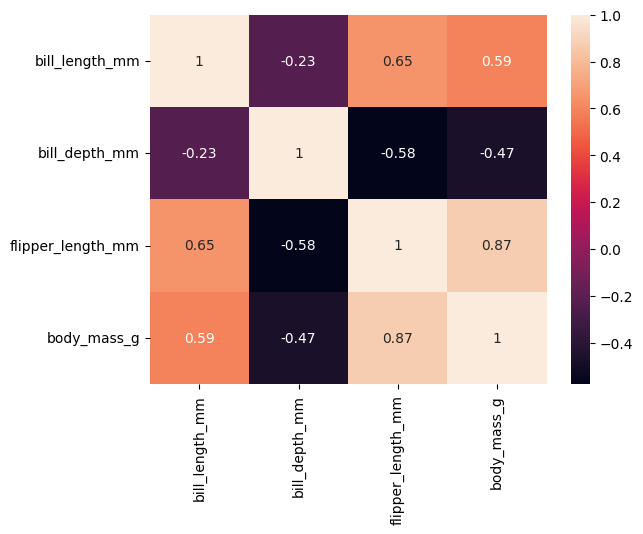

In [58]:
sns.heatmap(df.corr(), annot=True)

### One-Hot-Encoding
make numerical columns out of one categorical column

In [60]:
import pandas as pd
binary = pd.get_dummies(df['species'])
df2 = pd.concat([df, binary], axis=1)

df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0


/tmp/ipykernel_295538/1738403036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<AxesSubplot: >

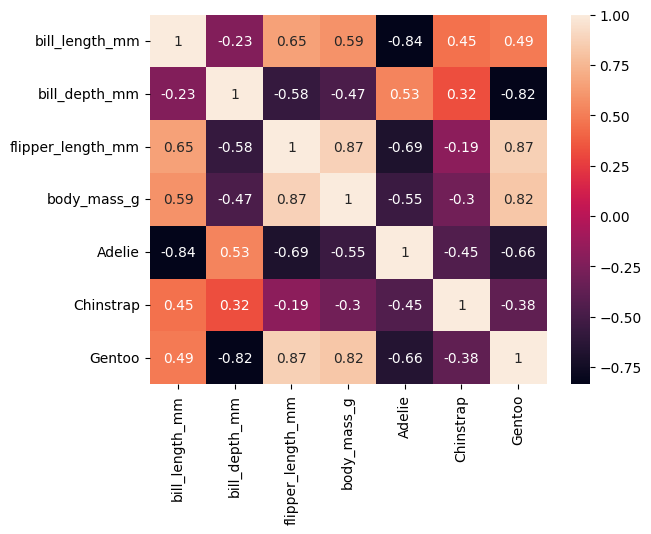

In [61]:
sns.heatmap(df2.corr(), annot=True)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

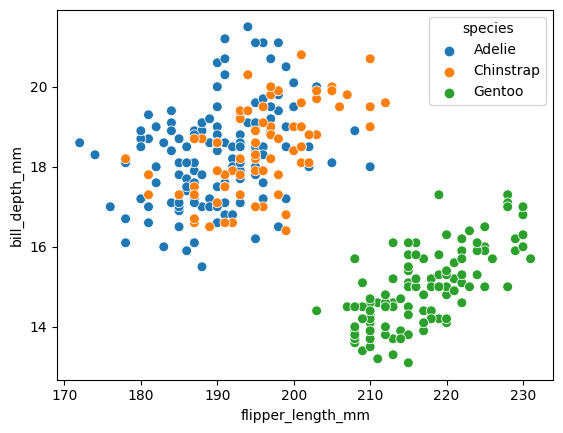

In [62]:
sns.scatterplot(data=df, 
                x="flipper_length_mm",
                y="bill_depth_mm",
                s=50,
                hue="species",
               )